Accuracy:  0.9411764705882353 

Recall Score:  0.9230769230769231 

Precision Score:  0.9230769230769231 

F1 Score:  0.9230769230769231 

Specificity:  0.9523809523809523 

Confustion matrix:
 [[40  2]
 [ 2 24]] 



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

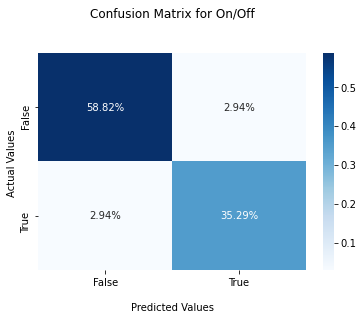

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#importing the dataset and splitting it into training and testing data
dataset = pd.read_csv('trainingDataset1week.csv')
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has on/off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#training the decision tree classsifier
model1 = RandomForestClassifier(n_estimators=150)
model1.fit(X_train, y_train.values.ravel())

#predicting with the trained model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1)
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1)
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1)
print ("F1 Score: ", f1score,"\n")

#specificity
tn, fp, fn, tp = confusion_matrix(y_test, prediction1).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", specificity,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix 
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for On/Off\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

Random Forest: AUROC = 0.982 



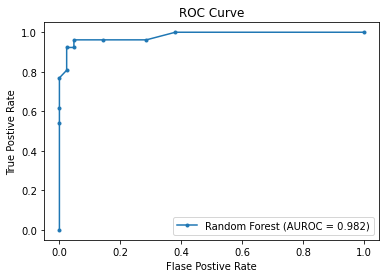

In [3]:
#AUROC score
dt_probs = model1.predict_proba(X_test)
dt_probs = dt_probs[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)
print("Random Forest: AUROC = %.3f \n" %(dt_auc))

#visualizing the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(dt_fpr, dt_tpr, marker=".", label="Random Forest (AUROC = %0.3f)" % dt_auc)
plt.title("ROC Curve")
plt.xlabel("Flase Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

Accuracy:  0.75 

Recall Score:  0.75 

Precision Score:  0.7911764705882353 

F1 Score:  0.7429473195927988 

Confustion matrix:
 [[13  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  2  0 19  0  0  0  0]
 [ 0  0  2  2  5  2  1  0]
 [ 0  0  0  0  0  7  2  0]
 [ 0  0  0  0  0  3  4  0]
 [ 0  0  0  0  0  0  1  0]] 



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


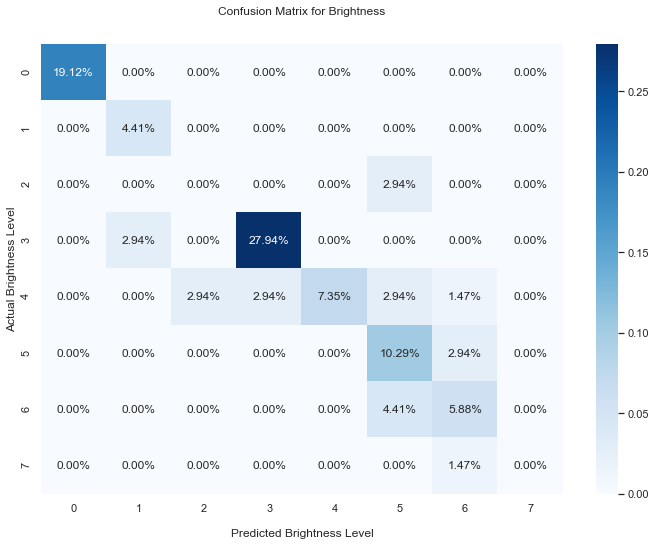

In [8]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Color temp (x*1000)Kelvin']) #only has brightness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = RandomForestClassifier(n_estimators=150)
model1.fit(X_train, y_train.values.ravel())

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Brightness\n\n');
ax.set_xlabel('\nPredicted Brightness Level')
ax.set_ylabel('Actual Brightness Level');

Accuracy:  0.7205882352941176 

Recall Score:  0.7205882352941176 

Precision Score:  0.7190826330532213 

F1 Score:  0.712583281869465 

Confustion matrix:
 [[ 3  2  0  0  0  0  0]
 [ 0 23  0  0  0  3  0]
 [ 0  1  0  0  3  0  0]
 [ 0  0  0  6  1  2  0]
 [ 0  2  0  2  2  0  0]
 [ 0  1  0  0  1  1  0]
 [ 0  1  0  0  0  0 14]] 



C:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


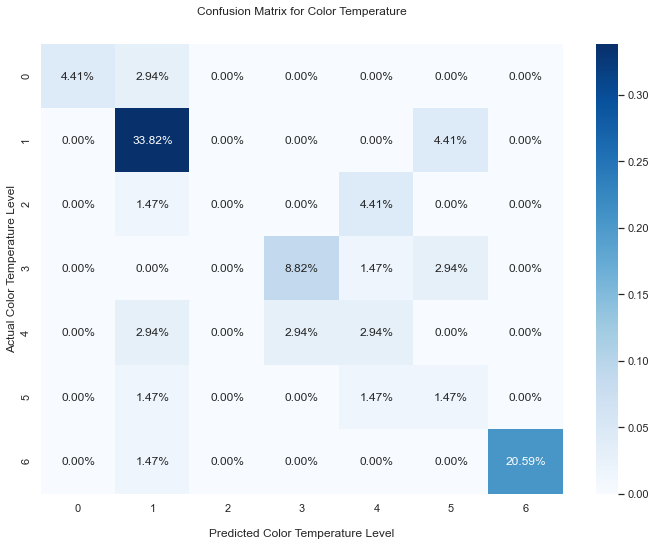

In [12]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Brightness (x*10)%']) #only has color temperature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = RandomForestClassifier(n_estimators=150)
model1.fit(X_train, y_train.values.ravel())

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Color Temperature\n\n');
ax.set_xlabel('\nPredicted Color Temperature Level')
ax.set_ylabel('Actual Color Temperature Level');